Проект e-commerce
Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз?  

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 
5.1. Выполните когортный анализ пользователей.

5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. Для визуализации когортной таблицы рекомендуем использовать пример из этого конспекта.

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. 

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

Файлы:

 olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

olist_orders_dataset.csv —  таблица заказов
order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5

Уникальные статусы заказов в таблице olist_orders_dataset:

created —  создан
approved —  подтверждён
invoiced —  выставлен счёт
processing —  в процессе сборки заказа
shipped —  отгружен со склада
delivered —  доставлен пользователю
unavailable —  недоступен
canceled —  отменён

In [2]:
import pandas as pd
customers=pd.read_csv('olist_customers_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
items=pd.read_csv('olist_order_items_dataset.csv')

In [3]:
customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [4]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
items.head(10)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

In [6]:
customers.groupby('customer_unique_id').agg({'customer_id':'count'}).query('customer_id=="1"')

,customer_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


Ответ: 93099

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [7]:
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_estimated_delivery_date'] = orders['order_estimated_delivery_date'].dt.to_period('M')
# получаем значение года и месяца в столбце с ожидаемой датой доставки

In [8]:
orders_otmena=orders.query('order_status != "delivered"')
# таблица без доставленных заказов

In [9]:
no_delivery=orders_otmena.groupby(['order_estimated_delivery_date', 'order_status']).agg({'order_id':'count'}).reset_index()
no_delivery.rename(columns={'order_id':'count'}, inplace=True)
avg=no_delivery.groupby('order_status').agg({'count':'mean'}).reset_index()
avg
# детализация по причинам, если исходить из расчёта, что причиной является статус заказа, отличный от 'delivered'

,order_status,count
0,approved,1.000000
1,canceled,24.038462
2,created,1.666667
3,invoiced,14.952381
4,processing,15.842105
5,shipped,48.130435
6,unavailable,29.000000


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [10]:
df_3=pd.merge(orders, items, on='order_id')
# будем считать за время покупки товара столбец 'order_purchase_timestamp' 
# и создадим столбец с днями недели, соответствующими датам из этой колонки
df_3['order_purchase_timestamp'] = pd.to_datetime(df_3['order_purchase_timestamp'])
df_3['day_of_week']=df_3['order_purchase_timestamp'].dt.day_name()
df_3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday


In [11]:
items_by_daysofweek=df_3.groupby(['product_id', 'day_of_week'])\
    .agg({'product_id':'count'})\
    .rename(columns={'product_id':'num_of_purchases'})\
    .reset_index()
items_by_daysofweek

,product_id,day_of_week,num_of_purchases
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
61225,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
61226,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
61227,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
61228,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


In [12]:
max_orders=items_by_daysofweek.loc[items_by_daysofweek.groupby('product_id')['num_of_purchases'].idxmax()]
max_orders=max_orders[['product_id', 'day_of_week']]\
    .reset_index(drop=True)
max_orders


,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


# Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)

In [13]:
df_4=pd.merge(customers, orders, on='customer_id')
# будем считать за покупку дату из столбца 'order_purchase_timestamp', не беря во внимание то, что иногда товары не доставляются.
df_4['order_purchase_timestamp']=pd.to_datetime(df_4['order_purchase_timestamp'])
df_4['month'] = df_4['order_purchase_timestamp'].dt.to_period('M')
purch_by_month=df_4.groupby(['customer_unique_id', 'month'])\
    .agg({'order_id':'count'})\
    .rename(columns={'order_id':'purchases'})\
    .reset_index()
purch_by_month

,customer_unique_id,month,purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
98043,ffff371b4d645b6ecea244b27531430a,2017-02,1
98044,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [14]:
purch_by_month['weeks_in_month']=purch_by_month['month'].dt.days_in_month / 7
purch_by_month['avg_purchases_per_week']=purch_by_month['purchases'] / purch_by_month['weeks_in_month']
purch_by_month

,customer_unique_id,month,purchases,weeks_in_month,avg_purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333
...,...,...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,4.285714,0.233333
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,4.428571,0.225806
98043,ffff371b4d645b6ecea244b27531430a,2017-02,1,4.000000,0.250000
98044,ffff5962728ec6157033ef9805bacc48,2018-05,1,4.428571,0.225806


In [15]:
result4=purch_by_month[['customer_unique_id', 'month', 'avg_purchases_per_week']]
result4

,customer_unique_id,month,avg_purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.233333
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.225806
98043,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
98044,ffff5962728ec6157033ef9805bacc48,2018-05,0.225806


# 5.1. Выполните когортный анализ пользователей.

In [16]:
customers_by_state=customers.groupby('customer_state')\
    .agg({'customer_unique_id':'count'})\
    .rename(columns={'customer_unique_id':'unique_customers'})\
    .sort_values(by='unique_customers', ascending= False)\
    .reset_index()


In [17]:
# Рассмотрим когорты по штатам

In [18]:
customers_by_state

,customer_state,unique_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [19]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders.sort_values(by='order_purchase_timestamp', ascending=False).head(30)
# интересная аномалия: почти все заказы с конца августа-начала сентября по середину октября были отменены

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
60938,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaN,NaN,NaN,2018-10
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,2018-11
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaN,NaN,NaN,2018-10
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,2018-10
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaN,NaN,NaN,2018-10
37003,869997fbe01f39d184956b5c6bccfdbe,55c9dad94ec1a2ba57998bdb376c230a,canceled,2018-09-26 08:40:15,NaN,NaN,NaN,2018-10
33979,5aac76cf7b07dd06fa4d50bf461d2f40,7a8a02e54cf3472df427e927f8b9c046,canceled,2018-09-25 11:59:18,NaN,NaN,NaN,2018-10
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10
16366,bd35b677fd239386e9861d11ae98ab56,ad2eb5d02c0808bcd8743117f6383cf6,canceled,2018-09-17 17:21:16,NaN,NaN,NaN,2018-10
5149,ea844c92cf978ea23321fa7fe5871761,6ddc45ad08e6a2c885ca2255fc52d6df,canceled,2018-09-13 09:56:12,NaN,NaN,NaN,2018-09


In [20]:
df_cog_2018=pd.merge(orders, customers, on='customer_id')\
    .query('order_purchase_timestamp >= "2018-01-01"')
df_cog_2018

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99428,c22a47117b6a87c967b0c278488110c1,6e153567dc52ea59c0498ef5383e9c7a,delivered,2018-06-22 20:53:29,2018-06-22 21:17:45,2018-06-25 17:50:00,2018-07-03 19:48:54,2018-07,e930b415f39ab827ea66de80a9d36a22,13218,jundiai,SP
99430,c81f74e50f0496fa39716cc77cacd460,7b270ebc87c25c8404348c10ff80a80e,delivered,2018-03-04 22:48:38,2018-03-04 23:09:22,2018-03-05 16:15:04,2018-03-13 18:54:32,2018-03,324a22205906aa2612a33e63c00ca8bb,31130,belo horizonte,MG
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [21]:
items_cust_ord_2018=pd.merge(df_cog_2018, items, on='order_id')
items_cust_ord_2018

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
3,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG,1,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,2018-06-18 03:13:12,31.90,18.23
4,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP,1,10adb53d8faa890ca7c2f0cbcb68d777,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-27 17:55:14,19.90,12.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61411,c81f74e50f0496fa39716cc77cacd460,7b270ebc87c25c8404348c10ff80a80e,delivered,2018-03-04 22:48:38,2018-03-04 23:09:22,2018-03-05 16:15:04,2018-03-13 18:54:32,2018-03,324a22205906aa2612a33e63c00ca8bb,31130,belo horizonte,MG,1,cb92637d91f8267856d2143b6fc7bd9e,376a891762bbdecbc02b4b6adec3fdda,2018-03-08 23:09:22,55.00,15.83
61412,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
61413,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
61414,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [22]:
# Посчитаем сколько выручки принесли пользователи из разных штатов за последнийе годы.
rev_2018=items_cust_ord_2018.groupby('customer_state')\
    .agg({'price':'sum'})\
    .sort_values(by = 'price', ascending=False)\
    .rename(columns={'price':'revenue_2018'})\
    .reset_index()
rev_2018

,customer_state,revenue_2018
0,SP,2975757.23
1,RJ,906646.41
2,MG,857267.79
3,RS,387089.80
4,PR,385875.82
5,SC,284423.01
6,BA,272728.61
7,DF,166819.04
8,GO,155105.42
9,ES,154339.15


In [23]:
df_cog_2017=pd.merge(orders, customers, on='customer_id')\
    .query('order_purchase_timestamp >= "2017-01-01" and order_purchase_timestamp < "2018-01-01"')
df_cog_2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP


In [24]:
items_cust_ord_2017=pd.merge(df_cog_2017, items, on='order_id')
items_cust_ord_2017

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,2017-10-10 20:07:14,26.90,36.98
50860,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03,e03dbdf5e56c96b106d8115ac336f47f,35502,divinopolis,MG,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-02-03 00:30:03,370.00,19.43
50861,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,1,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,2017-02-27 09:05:12,139.90,16.09
50862,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08


In [25]:
rev_2017=items_cust_ord_2017.groupby('customer_state')\
    .agg({'price':'sum'})\
    .sort_values(by = 'price', ascending=False)\
    .rename(columns={'price':'revenue_2017'})\
    .reset_index()
rev_2017

,customer_state,revenue_2017
0,SP,2212487.00
1,RJ,906199.81
2,MG,723229.03
3,RS,359072.60
4,PR,295192.43
5,BA,237727.33
6,SC,233757.27
7,GO,138502.14
8,DF,134741.13
9,PE,123588.05


In [26]:
df_cog_2016=pd.merge(orders, customers, on='customer_id')\
    .query('order_purchase_timestamp < "2017-01-01"')
df_cog_2016

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12,07d5b1f9bdd053347f0213187b343ac9,3531,sao paulo,SP
378,cbbb524a0e1646aa6cf7a3c0bbe517ad,dacb079d55ffb1d3955c5d923df3ebb7,delivered,2016-10-05 07:31:49,2016-10-06 02:46:24,2016-10-10 02:46:24,2016-10-16 14:36:00,2016-12,12cc890391e57d7123e004856ff1f137,50090,recife,PE
699,ac2b7c522d811acba0aa270ed3e112e4,ef21aebbb093a6db29ccc6aa0b89c347,delivered,2016-10-05 15:08:00,2016-10-06 15:44:26,2016-10-10 15:44:27,2016-10-13 15:44:27,2016-11,664f7107c351f24b16b68919398730a0,13610,leme,SP
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04 14:13:22,2016-10-04 14:46:48,2016-10-08 14:46:49,2016-10-11 14:46:49,2016-11,1dc848c11c2985635c268ff3dea707eb,21853,rio de janeiro,RJ
1449,5cd498954e2b37d71b315166809b4bd7,ff1a56726b7ea149c7423865609cc0c8,delivered,2016-10-07 00:54:40,2016-10-08 03:56:15,2016-10-25 11:35:52,2016-10-27 17:32:07,2016-12,fb48b86d9a78b53675c121e4ec8981ed,21220,rio de janeiro,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
98322,6e0d2539e48e84296bae6290de41058c,1fc56719b52f82c03caddc5faf531fbb,delivered,2016-10-04 19:41:52,2016-10-06 15:51:37,2016-11-10 16:47:52,2016-11-17 09:23:50,2016-11,40b41ade17bb2121b576b07e25ce622b,95500,santo antonio da patrulha,RS
98484,9d664ec86be69d869bb6870294c4fdd8,0a9ee4d9030acbe428769c79d0c4da69,delivered,2016-10-08 15:02:10,2016-10-08 19:55:50,2016-10-12 19:55:50,2016-10-31 11:35:45,2016-12,d0f63e7f9adb09e4efc7f4f276b977e4,45355,apuarema,BA
99035,7e2dddf174cc4d2768bf39c43ab2bd7a,accfbaa1f092fdf6db1d8fcdad351b50,delivered,2016-10-09 15:10:41,2016-10-10 05:54:51,2016-11-03 07:43:55,2016-11-10 09:27:42,2016-12,1c5aefec1a2943edd15e52f9e2900e41,39860,nanuque,MG
99248,e439ced3d48f1a77f6ecc029cc946a6f,e9c6723e04c4e53e7e9c3afe383f3866,delivered,2016-10-07 22:35:59,2016-10-07 22:59:53,2016-10-15 10:31:09,2016-10-25 21:15:45,2016-12,84717d840af87a7fa12a66a0933ede2a,13720,sao jose do rio pardo,SP


In [27]:
items_cust_ord_2016=pd.merge(df_cog_2016, items, on='order_id')
items_cust_ord_2016

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12,07d5b1f9bdd053347f0213187b343ac9,3531,sao paulo,SP,1,ca17b18b38db6e0d2c33d362322f2a06,4be2e7f96b4fd749d52dff41f80e39dd,2016-10-21 16:24:45,267.00,32.84
1,cbbb524a0e1646aa6cf7a3c0bbe517ad,dacb079d55ffb1d3955c5d923df3ebb7,delivered,2016-10-05 07:31:49,2016-10-06 02:46:24,2016-10-10 02:46:24,2016-10-16 14:36:00,2016-12,12cc890391e57d7123e004856ff1f137,50090,recife,PE,1,bab7ff9abbcc13690a62d015f2ca8e44,229c3efbfb0ea2058de4ccdfbc3d784a,2016-10-10 02:46:24,75.00,20.58
2,ac2b7c522d811acba0aa270ed3e112e4,ef21aebbb093a6db29ccc6aa0b89c347,delivered,2016-10-05 15:08:00,2016-10-06 15:44:26,2016-10-10 15:44:27,2016-10-13 15:44:27,2016-11,664f7107c351f24b16b68919398730a0,13610,leme,SP,1,4632bc49b300378ed4f1d48f424d414e,ed859002ad59dbf8cf3602696a6c3000,2016-10-10 15:44:27,294.90,20.34
3,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04 14:13:22,2016-10-04 14:46:48,2016-10-08 14:46:49,2016-10-11 14:46:49,2016-11,1dc848c11c2985635c268ff3dea707eb,21853,rio de janeiro,RJ,1,35084deab9603bbb6035bb8638b1df89,df560393f3a51e74553ab94004ba5c87,2016-10-08 14:46:49,93.90,17.61
4,5cd498954e2b37d71b315166809b4bd7,ff1a56726b7ea149c7423865609cc0c8,delivered,2016-10-07 00:54:40,2016-10-08 03:56:15,2016-10-25 11:35:52,2016-10-27 17:32:07,2016-12,fb48b86d9a78b53675c121e4ec8981ed,21220,rio de janeiro,RJ,1,896a64a7f34cdfef2c60ce59fa2a148f,82bd0703a4aefd6b599e5bfdaed378fb,2016-10-12 03:56:16,44.90,15.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,6e0d2539e48e84296bae6290de41058c,1fc56719b52f82c03caddc5faf531fbb,delivered,2016-10-04 19:41:52,2016-10-06 15:51:37,2016-11-10 16:47:52,2016-11-17 09:23:50,2016-11,40b41ade17bb2121b576b07e25ce622b,95500,santo antonio da patrulha,RS,1,4fee671ea459ebc96546523917e254a5,822b63912576852aea9a8436d72317b7,2016-10-21 16:19:48,949.99,32.42
366,9d664ec86be69d869bb6870294c4fdd8,0a9ee4d9030acbe428769c79d0c4da69,delivered,2016-10-08 15:02:10,2016-10-08 19:55:50,2016-10-12 19:55:50,2016-10-31 11:35:45,2016-12,d0f63e7f9adb09e4efc7f4f276b977e4,45355,apuarema,BA,1,d26580768894ea0cdc9f19dc672956c2,d50d79cb34e38265a8649c383dcffd48,2016-10-12 19:55:50,169.99,34.39
367,7e2dddf174cc4d2768bf39c43ab2bd7a,accfbaa1f092fdf6db1d8fcdad351b50,delivered,2016-10-09 15:10:41,2016-10-10 05:54:51,2016-11-03 07:43:55,2016-11-10 09:27:42,2016-12,1c5aefec1a2943edd15e52f9e2900e41,39860,nanuque,MG,1,e41a6ac2f57a273eb0d214c7cbab5db9,a7f13822ceb966b076af67121f87b063,2016-10-14 05:54:52,129.97,29.38
368,e439ced3d48f1a77f6ecc029cc946a6f,e9c6723e04c4e53e7e9c3afe383f3866,delivered,2016-10-07 22:35:59,2016-10-07 22:59:53,2016-10-15 10:31:09,2016-10-25 21:15:45,2016-12,84717d840af87a7fa12a66a0933ede2a,13720,sao jose do rio pardo,SP,1,a694f2632fae82ef419fd71587103dc9,989becdce12ebc39863c2bceab6f3ca1,2016-10-11 22:59:53,138.00,22.44


In [28]:
rev_2016=items_cust_ord_2016.groupby('customer_state')\
    .agg({'price':'sum'})\
    .sort_values(by = 'price', ascending=False)\
    .rename(columns={'price':'revenue_2016'})\
    .reset_index()
rev_2016

,customer_state,revenue_2016
0,SP,14710.82
1,RJ,11246.45
2,MG,4811.21
3,RS,4141.62
4,SC,2373.06
5,PR,2015.51
6,CE,1689.38
7,PE,1369.10
8,PA,1087.60
9,DF,1043.77


In [29]:
revenue_by_states=pd.merge(rev_2016, rev_2017, on='customer_state')
revenue_by_states=pd.merge(revenue_by_states, rev_2018, on='customer_state')
revenue_by_states=pd.merge(revenue_by_states, customers_by_state, on='customer_state')
revenue_by_states
# Важно: в 2016 есть информация лишь с сентября, а в 2018 лишь по октябрь
# Тем не менее, из полученной таблицы можно извлечь много интересных фактов.


,customer_state,revenue_2016,revenue_2017,revenue_2018,unique_customers
0,SP,14710.82,2212487.00,2975757.23,41746
1,RJ,11246.45,906199.81,906646.41,12852
2,MG,4811.21,723229.03,857267.79,11635
3,RS,4141.62,359072.60,387089.80,5466
4,SC,2373.06,233757.27,284423.01,3637
5,PR,2015.51,295192.43,385875.82,5045
6,CE,1689.38,112865.61,112699.72,1336
7,PE,1369.10,123588.05,137830.88,1652
8,PA,1087.60,91004.93,86855.28,975
9,DF,1043.77,134741.13,166819.04,2140


In [30]:
# Посмотрим, в каких штатах у нас больше всего лояльных пользователей. 
# За лояльных будем считать тех, кто совершил больше 3 заказов за всё время.


In [31]:
df_5=pd.merge(orders, customers, on='customer_id')
df_5

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [32]:
df_loyal=df_5.groupby(['customer_unique_id', 'customer_state']).agg({'order_id':'count'})
df_loyal=df_loyal.query('order_id > 3')
df_loyal_by_states=df_loyal.groupby('customer_state').agg({'order_id':'count'})
df_loyal_by_states.sort_values(by='order_id', ascending=False)
# У нас очень мало пользователей возвращаются за новыми покупками. 
# Больше всего лояльных в SP, но даже там их число слишком мало, учитывая общее количество уникальных пользователей.

,order_id
customer_state,
SP,16
RJ,6
RS,6
MG,4
ES,3
PR,3
PB,2
PE,2
SC,2


# 5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут.
Для визуализации когортной таблицы рекомендуем использовать пример из этого конспекта.

In [33]:
# Будем рассматривать информацию за 2017 год, так как только в этом году у нас есть данные по всем месяцам. Когортами будут
# новые пользователи, которые присоединились в определенный месяц года, исключая декабрь (так я поняла формулировку "с января по декабрь").
# Retention rate будет расчитан только для пользователей, совершивших покупку на 3-й месяц (дальнейшие покупки не учитываются
# и не будут включены в  понятие удержанного пользователя). Также будем учитывать только тех пользователей,
# у которых был доставлен заказ (order_status == "delivered").


In [34]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [35]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02


In [36]:
cust_ord=orders.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id').query('order_status=="delivered"')
cust_ord=cust_ord[['customer_unique_id', 'order_approved_at']]

In [37]:
cust_ord['order_approved_at'] = pd.to_datetime(cust_ord['order_approved_at'])
cust_ord['order_approved_at'] = cust_ord['order_approved_at'].dt.date
cust_ord['order_approved_at'] = pd.to_datetime(cust_ord['order_approved_at'])
cust_ord


,customer_unique_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02
1,af07308b275d755c9edb36a90c618231,2018-07-26
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13
...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09
99437,da62f9e57a76d978d02ab5362c509660,2018-02-06
99438,737520a9aad80b3fbbdad19b66b37b30,2017-08-27
99439,5097a5312c8b157bb7be58ae360ef43c,2018-01-08


In [38]:
first_purchase = cust_ord.groupby('customer_unique_id')['order_approved_at'].min().reset_index()
first_purchase['first_order'] = first_purchase['order_approved_at']
cust_ord = cust_ord.merge(first_purchase[['customer_unique_id', 'first_order']], on='customer_unique_id')
cust_ord=cust_ord.query('order_approved_at >= "2017-01-01" and order_approved_at < "2018-02-01"') 
cust_ord=cust_ord.query('first_order >= "2017-01-01" and first_order < "2017-12-01"') 
cust_ord

,customer_unique_id,order_approved_at,first_order
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2017-09-04
1,7c396fd4830fd04220f754e42b4e5bff,2017-09-04,2017-09-04
4,7c142cf63193a1473d2e66489a9ae977,2017-11-18,2017-11-18
6,80bb27c7c16e8f973207a5086ab329e2,2017-07-09,2017-07-09
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16,2017-05-16
...,...,...,...
96470,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04,2017-10-04
96471,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27,2017-01-27
96472,831ce3f1bacbd424fc4e38fbd4d66d29,2017-02-23,2017-02-23
96473,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,2017-03-09


In [39]:
cust_ord['third_month_start'] = cust_ord['first_order'] + pd.DateOffset(months=2)
cust_ord['third_month_end'] = cust_ord['third_month_start'] + pd.DateOffset(months=1)
cust_ord

,customer_unique_id,order_approved_at,first_order,third_month_start,third_month_end
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2017-09-04,2017-11-04,2017-12-04
1,7c396fd4830fd04220f754e42b4e5bff,2017-09-04,2017-09-04,2017-11-04,2017-12-04
4,7c142cf63193a1473d2e66489a9ae977,2017-11-18,2017-11-18,2018-01-18,2018-02-18
6,80bb27c7c16e8f973207a5086ab329e2,2017-07-09,2017-07-09,2017-09-09,2017-10-09
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16,2017-05-16,2017-07-16,2017-08-16
...,...,...,...,...,...
96470,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04,2017-10-04,2017-12-04,2018-01-04
96471,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27,2017-01-27,2017-03-27,2017-04-27
96472,831ce3f1bacbd424fc4e38fbd4d66d29,2017-02-23,2017-02-23,2017-04-23,2017-05-23
96473,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,2017-03-09,2017-05-09,2017-06-09


In [40]:
retention = cust_ord[(cust_ord['order_approved_at'] >= cust_ord['third_month_start']) & 
               (cust_ord['order_approved_at'] < cust_ord['third_month_end'])]
retention['first_order']=retention.first_order.dt.month
retention

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,customer_unique_id,order_approved_at,first_order,third_month_start,third_month_end
61,51838d41add414a0b1b989b7d251d9ee,2017-06-06,3,2017-05-13,2017-06-13
261,ba77e9b6506636dcbd03e463d4786f24,2017-07-02,4,2017-06-14,2017-07-14
262,ba77e9b6506636dcbd03e463d4786f24,2017-07-02,4,2017-06-14,2017-07-14
422,95cfb39a7e263160308a934e42cfc4e0,2017-11-22,9,2017-11-15,2017-12-15
776,0a609db8d244100909a15d65eadf8539,2017-10-18,8,2017-10-07,2017-11-07
...,...,...,...,...,...
72611,e7688fef5438be571d0c39bbb3e8e998,2017-10-28,8,2017-10-12,2017-11-12
75602,334293c291f43a6aa85020f8597a171f,2017-10-07,8,2017-10-02,2017-11-02
75995,d66f438b3fcdcf22e7224aaeaf525443,2017-11-26,8,2017-10-29,2017-11-29
76911,f62d6572c9c25b3796d058d7b833f8b7,2017-06-10,3,2017-05-20,2017-06-20


In [81]:
retention_counts = retention.groupby('first_order')['customer_unique_id'].nunique().reset_index()
retention_counts.columns = ['first_month', 'retained_customers']
retention_counts
# Судя по получившейся таблице, из новых январских покупателей никто не вернулся через три месяца,
# а самый высокий retention был у сентябрьских новопришелших покупателей.

,first_month,retained_customers
0,2,3
1,3,14
2,4,6
3,5,13
4,6,14
5,7,10
6,8,12
7,9,19
8,10,5
9,11,10


# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (23 балла)

In [42]:
from datetime import timedelta
df6=orders.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id')
df6 = df6.dropna(subset=['order_approved_at'])
df6['order_approved_at']=pd.to_datetime(df6['order_approved_at'])  
now = df6['order_approved_at'].max() + timedelta(days=1) # сделаем имитацию настоящего момента
now

Timestamp('2018-09-04 17:40:06')

In [43]:
df6['DaysSinceOrder'] =df6['order_approved_at'].apply(lambda x: (now - x).days)
rfm=df6[['order_approved_at', 'DaysSinceOrder']]
aggr= {'DaysSinceOrder': lambda x: x.min()}
rfm = df6.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency'}, inplace=True)
Frequency=df6.groupby('customer_unique_id').agg({'order_approved_at':'count'})
Frequency.rename(columns={'order_approved_at': 'Frequency'}, inplace=True)
rfm=pd.merge(rfm, Frequency, on='customer_unique_id')
rfm

,customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1
...,...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,452,1
95993,fffea47cd6d3cc0a88bd621562a9d061,267,1
95994,ffff371b4d645b6ecea244b27531430a,574,1
95995,ffff5962728ec6157033ef9805bacc48,125,1


In [44]:
df6=pd.merge(df6, items[['order_id', 'price']], on='order_id')
Monetary=df6.groupby('customer_unique_id').agg({'price':'sum'})
Monetary.rename(columns={'price': 'Monetary'}, inplace=True)
rfm=pd.merge(rfm, Monetary, on='customer_unique_id')
rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
95404,ffff371b4d645b6ecea244b27531430a,574,1,89.90
95405,ffff5962728ec6157033ef9805bacc48,125,1,115.00


In [45]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [46]:
def r_score(x):
    if x <= quintiles['Recency'][0.2]:
        return 5
    elif x <= quintiles['Recency'][0.4]:
        return 4
    elif x <= quintiles['Recency'][0.6]:
        return 3
    elif x <= quintiles['Recency'][0.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][0.2]:
        return 1
    elif x <= quintiles[c][0.4]:
        return 2
    elif x <= quintiles[c][0.6]:
        return 3
    elif x <= quintiles[c][0.8]:
        return 4
    else:
        return 5    

In [47]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5
...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,5
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2
95404,ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,1,3
95405,ffff5962728ec6157033ef9805bacc48,125,1,115.00,4,1,4


In [48]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215
...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,5,115
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2,312
95404,ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,1,3,113
95405,ffff5962728ec6157033ef9805bacc48,125,1,115.00,4,1,4,414


Рассмотрим 6 сегментов, основанных на R и M scores. Вот их описание:
    1. M:1-2, R:1 "Not a big deal" - Непримечательные покупатели, давно покинувшие нас и не оставившие больших денег.
    2. M:3-5, R:1-2 "Please, come back!" - Покупали на большие суммы, но ушли от нас. Нужна стратегия по их возвращению.
    3. M:1-2, R:2-3 "Just passing by" - Нет оснований что-то с ними делать, покупали достаточно давно, принесли мало денег, скорее всего "одноразовые" покупатели.
    4. M:1-2, R:4-5 "Newcomers" - новые покупатели на пока ещё некрупные суммы или лояльные - нужно удерживать!
    5. M:3-5, R:3-4 "Need attention" - полезные покупатели на крупные суммы, которые стали про нас забывать, за ними нужно пристальное внимания и тактики удержания.
    6. M:3-5, R:5 "Besties" - самые "дорогие" покупатели, вероятно самые лояльные, их точно нельзя упускать.    
    
    
Поскольку сегменты были созданы лишь на основе Recency и Monetary scores, то значения Frequency для каждого сегмента могут принимать любые возможные значения: от 1 до 17.
Сегмент "Not a big deal" : recency от 390 до 700, monetary от 3.9 до 69.9

Сегмент "Please, come back!" : recency от 274 до 719, monetary от 69.97 до 13440.0

Сегмент "Just passing by" : recency от 183 до 389, monetary от 2.29 до 69.9

Сегмент "Newcomers" : recency от 6 до 182, monetary от 0.85 до 69.9

Сегмент "Need attention" : recency от 99 до 273, monetary от 69.94 до 4099.99

Сегмент "Besties" : recency от 1 до 98, monetary от 69.95 до 7160.0

In [49]:
segt_map = {
    r'[1-2]1': 'Not a big deal',
    r'[3-5][1-2]': 'Please, come back!',
    r'[1-2][2-3]': 'Just passing by',
    r'[1-2][4-5]': 'Newcomers',
    r'[3-5][3-4]': 'Need attention',
    r'[3-5]5': 'Besties',
}

rfm['Segment'] = rfm['M'].map(str) + rfm['R'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414,Need attention
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,Newcomers
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,Not a big deal
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,Just passing by
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,"Please, come back!"
...,...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,5,115,"Please, come back!"
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2,312,Just passing by
95404,ffff371b4d645b6ecea244b27531430a,574,1,89.90,1,1,3,113,"Please, come back!"
95405,ffff5962728ec6157033ef9805bacc48,125,1,115.00,4,1,4,414,Need attention


Провизуализируем распределение наших сегментов:

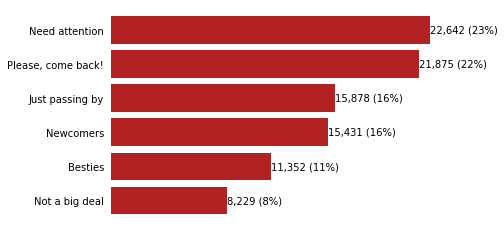

In [50]:
import matplotlib.pyplot as plt
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='firebrick')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()